In [1]:
# Import necessary libraries with new names
!pip install transformers datasets
import pandas as pd_gps_reviews
import torch as torch_gps_reviews
from sklearn.model_selection import train_test_split as gps_reviews_train_test_split
from sklearn.metrics import classification_report as gps_reviews_classification_report, confusion_matrix as gps_reviews_confusion_matrix
import matplotlib.pyplot as plt_gps_reviews
import seaborn as sns_gps_reviews
from transformers import BertTokenizer as BertTokenizer_gps_reviews, BertForSequenceClassification as BertForSequenceClassification_gps_reviews, Trainer as Trainer_gps_reviews, TrainingArguments as TrainingArguments_gps_reviews
from transformers import DataCollatorWithPadding as DataCollatorWithPadding_gps_reviews
from datasets import Dataset as Dataset_gps_reviews

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.6 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.6.1
    Uninstalling fsspec-2024.6.1:
      Successfully uninstalled fsspec-2024.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requir

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [17]:


# Function to load and preprocess the dataset
def load_and_preprocess_gps_reviews_data(file_path):
    """Load and preprocess the Google Play Store reviews dataset."""
    df_gps_reviews = pd_gps_reviews.read_csv(file_path)

    # Convert scores to binary labels: 1, 2, 3 -> Negative (0), 4, 5 -> Positive (1)
    df_gps_reviews['label_gps_reviews'] = df_gps_reviews['score'].apply(lambda x: 0 if x <= 3 else 1)

    # Select the relevant columns
    df_gps_reviews = df_gps_reviews[['content', 'label_gps_reviews']]

    # Split the dataset into train and test sets
    train_gps_reviews_df, test_gps_reviews_df = gps_reviews_train_test_split(df_gps_reviews, test_size=0.2, random_state=42)

    return train_gps_reviews_df, test_gps_reviews_df

# Function to tokenize the dataset
def tokenize_gps_reviews_function(examples):
    """Tokenize the content of Google Play Store reviews."""
    return tokenizer_gps_reviews(examples['content'], truncation=True)

from sklearn.metrics import accuracy_score as gps_reviews_accuracy_score
import torch

def compute_metrics_gps_reviews(eval_pred):
    """Compute accuracy metrics for Google Play Store reviews evaluation."""
    logits, labels = eval_pred
    # Convert logits to a PyTorch tensor if it's a NumPy array
    logits = torch.tensor(logits)  # Convert to tensor if needed
    predictions_gps_reviews = torch.argmax(logits, dim=-1)
    accuracy_gps_reviews = gps_reviews_accuracy_score(labels, predictions_gps_reviews)
    return {"accuracy": accuracy_gps_reviews}

# Function to train the BERT model
def train_gps_reviews_bert_model(train_dataset, test_dataset):
    """Fine-tune a BERT model on Google Play Store reviews."""

    # Ensure the dataset has the 'label' column correctly set for training
    train_dataset = train_dataset.rename_column("label_gps_reviews", "labels")
    test_dataset = test_dataset.rename_column("label_gps_reviews", "labels")

    # Load the pre-trained BERT model for sequence classification
    model_gps_reviews = BertForSequenceClassification_gps_reviews.from_pretrained('bert-base-uncased', num_labels=2)

    # Training arguments
    training_args_gps_reviews = TrainingArguments_gps_reviews(
        output_dir='./results_gps_reviews',
        evaluation_strategy="epoch",
        logging_strategy="steps",
        logging_steps=10,
        learning_rate=2e-5,
        per_device_train_batch_size=16,
        per_device_eval_batch_size=16,
        num_train_epochs=3,
        weight_decay=0.01,
        save_strategy="epoch",
        load_best_model_at_end=True,
        metric_for_best_model="accuracy",  # Ensure this matches the metric returned by compute_metrics_gps_reviews
        logging_dir='./logs_gps_reviews',  # Directory to save logs
    )

    # Initialize the Trainer
    trainer_gps_reviews = Trainer_gps_reviews(
        model=model_gps_reviews,
        args=training_args_gps_reviews,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
        tokenizer=tokenizer_gps_reviews,
        data_collator=data_collator_gps_reviews,
        compute_metrics=compute_metrics_gps_reviews,  # Include metric computation
    )

    # Fine-tune the BERT model
    trainer_gps_reviews.train()

    return trainer_gps_reviews


# Function to evaluate the model and display results
def evaluate_gps_reviews_model(trainer, test_dataset):
    """Evaluate the fine-tuned BERT model and display the results."""
    # Evaluate the model
    eval_gps_reviews_results = trainer.evaluate()

    # Make predictions on the test set
    predictions_gps_reviews = trainer.predict(test_dataset)
    preds_gps_reviews = predictions_gps_reviews.predictions.argmax(-1)

    # Generate classification report
    print(gps_reviews_classification_report(test_dataset['label_gps_reviews'], preds_gps_reviews))

    # Confusion Matrix
    cm_gps_reviews = gps_reviews_confusion_matrix(test_dataset['label_gps_reviews'], preds_gps_reviews)

    # Plot confusion matrix in yellow color
    plt_gps_reviews.figure(figsize=(8, 6))
    sns_gps_reviews.heatmap(cm_gps_reviews, annot=True, fmt='d', cmap='YlOrBr')
    plt_gps_reviews.xlabel('Predicted Labels')
    plt_gps_reviews.ylabel('True Labels')
    plt_gps_reviews.title('Google Play Store Reviews Confusion Matrix')
    plt_gps_reviews.show()


In [13]:
# Load and preprocess the dataset
train_gps_reviews_df, test_gps_reviews_df = load_and_preprocess_gps_reviews_data('/content/drive/My Drive/Training_Data_Google_Play_reviews_6000.csv')

# Convert pandas DataFrame to Hugging Face Dataset
train_gps_reviews_dataset = Dataset_gps_reviews.from_pandas(train_gps_reviews_df)
test_gps_reviews_dataset = Dataset_gps_reviews.from_pandas(test_gps_reviews_df)

# Load the BERT tokenizer
tokenizer_gps_reviews = BertTokenizer_gps_reviews.from_pretrained('bert-base-uncased')

# Apply tokenization to the datasets
train_gps_reviews_dataset = train_gps_reviews_dataset.map(tokenize_gps_reviews_function, batched=True)
test_gps_reviews_dataset = test_gps_reviews_dataset.map(tokenize_gps_reviews_function, batched=True)

# Data collator to handle dynamic padding
data_collator_gps_reviews = DataCollatorWithPadding_gps_reviews(tokenizer=tokenizer_gps_reviews)


Map:   0%|          | 0/4800 [00:00<?, ? examples/s]

Map:   0%|          | 0/1200 [00:00<?, ? examples/s]

In [18]:
# Train the BERT model
trainer_gps_reviews = train_gps_reviews_bert_model(train_gps_reviews_dataset, test_gps_reviews_dataset)



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
1,0.522300,0.460131,0.810833
2,0.509100,0.425409,0.825000
3,0.328000,0.451601,0.833333


              precision    recall  f1-score   support

           0       0.82      0.79      0.81       524
           1       0.84      0.87      0.85       676

    accuracy                           0.83      1200
   macro avg       0.83      0.83      0.83      1200
weighted avg       0.83      0.83      0.83      1200



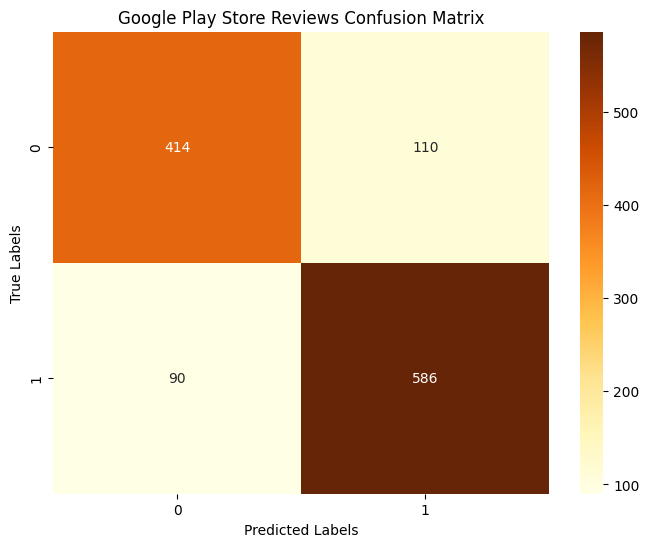

In [19]:
# Evaluate the model and display results
evaluate_gps_reviews_model(trainer_gps_reviews, test_gps_reviews_dataset)


In [25]:
import numpy as np_gps_reviews
# Function to show a sample of predictions
def display_sample_predictions(trainer, test_dataset, num_samples=10):
    """Display a sample of true labels and predicted labels."""

    # Get predictions
    predictions_gps_reviews = trainer.predict(test_dataset)
    preds_gps_reviews = np_gps_reviews.argmax(predictions_gps_reviews.predictions, axis=-1)

    # Convert dataset to pandas DataFrame for easy manipulation
    test_df = test_dataset.to_pandas()

    # Extract labels from the dataset and add them to the DataFrame
    test_df['labels'] = test_dataset['label_gps_reviews'] # Changed 'labels' to 'label_gps_reviews'

    # Add predictions to the DataFrame
    test_df['predicted_label_gps_reviews'] = preds_gps_reviews

    # Display a sample of the true and predicted labels
    sample_df = test_df[['content', 'labels', 'predicted_label_gps_reviews']].sample(n=num_samples)

    for index, row in sample_df.iterrows():
        print(f"Review: {row['content']}")
        print(f"True Label: {row['labels']} | Predicted Label: {row['predicted_label_gps_reviews']}\n")


# Display a sample of predictions
display_sample_predictions(trainer_gps_reviews, test_gps_reviews_dataset, num_samples=10)

Review: Not compatible with pixel 7 pro
True Label: 0 | Predicted Label: 0

Review: Qualcuno mi sa' dire perche' dopo l'ultimo aggiornamento e' sparito il T9 e non riesco piu' a metterlo???????
True Label: 1 | Predicted Label: 0

Review: È una app buona, ma non viene visualizzato l'orario corretto di ogni messaggio, alcuni messaggi non c'è proprio l'orario indicato
True Label: 0 | Predicted Label: 0

Review: Bast app
True Label: 1 | Predicted Label: 1

Review: Okay
True Label: 1 | Predicted Label: 1

Review: File dalla galleria con nuovo timer autodistruzione da schifo Ora solo 30 secondi massimo! Agg. Novità più che inutili 😓 per favore 🥺 io non aggiorno per adesso
True Label: 0 | Predicted Label: 0

Review: à chaque fois que je voulais faire un filtre mon écran devenait noir
True Label: 0 | Predicted Label: 0

Review: È possibile aggiungere nuove emoji di animali, come procione e ornitorinco grazie. Del procione ne esiste già ma è possibile crearne altre?
True Label: 1 | Predicted La